<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
### Hidden Layer:
### Output Layer:
### Neuron:
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [117]:
import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype(np.int64)

In [118]:


class Perceptron:
    
    def __init__(self, rate=0.01, niter=10):
        self.__rate = rate
        self.__niter = niter
        
    def fit(self, X, y):
        """
            Fit training data
            @param X: training vector
            @param y: target values
        """
        # weights
        self.weight = np.zeros(1 + X.shape[1])
        # number of misclassifications
        self.errors = []
        
        for i in range(self.__niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.__rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        """
            Calculate net input
        """
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(self, X):
        """
            Return class label after unit step
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        
    


In [119]:
perc = Perceptron(rate=.01, niter=100)

X = df[["x1", "x2"]].values
y = df["y"]

perc.fit(X, y)

In [120]:
from sklearn.metrics import accuracy_score

pred = perc.predict(X)
print(f"Predictions: {pred}")

accuracy_score(pred, y)

Predictions: [1 1 1 0]


1.0

Let's see exactly how many iterations we need.

Text(0.5, 1.0, 'Iterations vs Accuracy')

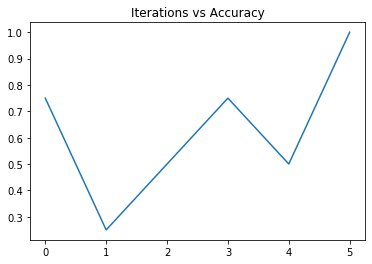

In [42]:
from matplotlib import pyplot as plt

accuracy = 0
n = 0
xs, ys = [], []

while accuracy < 1. and len(xs) < 1000:
    p = Perceptron(rate=0.01, niter=n)
    p.fit(X, y)
    accuracy = accuracy_score(p.predict(X), y)
    xs.append(n)
    ys.append(accuracy)
    
    n += 1

plt.plot(xs, ys)
plt.title("Iterations vs Accuracy")

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [107]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [113]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

feats = list(diabetes)[:-1]

X = StandardScaler().fit_transform(diabetes[feats].values)

y = diabetes["Outcome"]

In [114]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, niter = 10):
        self.__niter = niter
        
    
    def __sigmoid(self, x):
        return 1 / (1. + np.exp(-x))
    
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx * (1-sx)
    

    def fit(self, X, y):
        """
            Fit training data
            X : Training vectors, X.shape : [#samples, #features]
            y : Target values, y.shape : [#samples]
        """
        # Randomly Initialize Weights
        self.__weights = np.random.random(X.shape[1])

        for i in range(self.__niter):
            
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X, self.__weights)
            
            # Activate!
            activated_output = self.__sigmoid(weighted_sum)

            # Calc error
            error = y - activated_output
            adjustments = error * self.__sigmoid_derivative(activated_output)
            
            # Update the Weights
            self.__weights += np.dot(X.T, adjustments)
        
        return self
    

    def predict(self, X):
        """Return class label after unit step"""
        weighted_sum = np.dot(X, self.__weights)
        return self.__sigmoid(weighted_sum)

In [115]:
perc = Perceptron(1000)
perc.fit(X, y)

In [116]:
pred = perc.predict(X).astype(np.int64)
score = 100*accuracy_score(pred, y)
print(f"Accuracy: {score:,.2f}%")

Accuracy: 70.05%


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?